1. Import packages

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import keras


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


from tensorflow.keras.layers import Dense

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam



In [2]:
from preprocess import *

2. Create dataset with features & visualize data  
Vary the level of noise:  
1 = no noise  
2 = low noise  
3 = high noise

In [3]:
df1, daterange1, temperatures1 = create_dataset(0)
df2, daterange2, temperatures2 = create_dataset(2)
df3, daterange3, temperatures3 = create_dataset(5)

dateranges = [daterange1, daterange2, daterange3]
temperatures = [temperatures1, temperatures2, temperatures3]
titles = ["No Noise", "Low Noise", "High Noise"]
dfs = [df1, df2, df3]

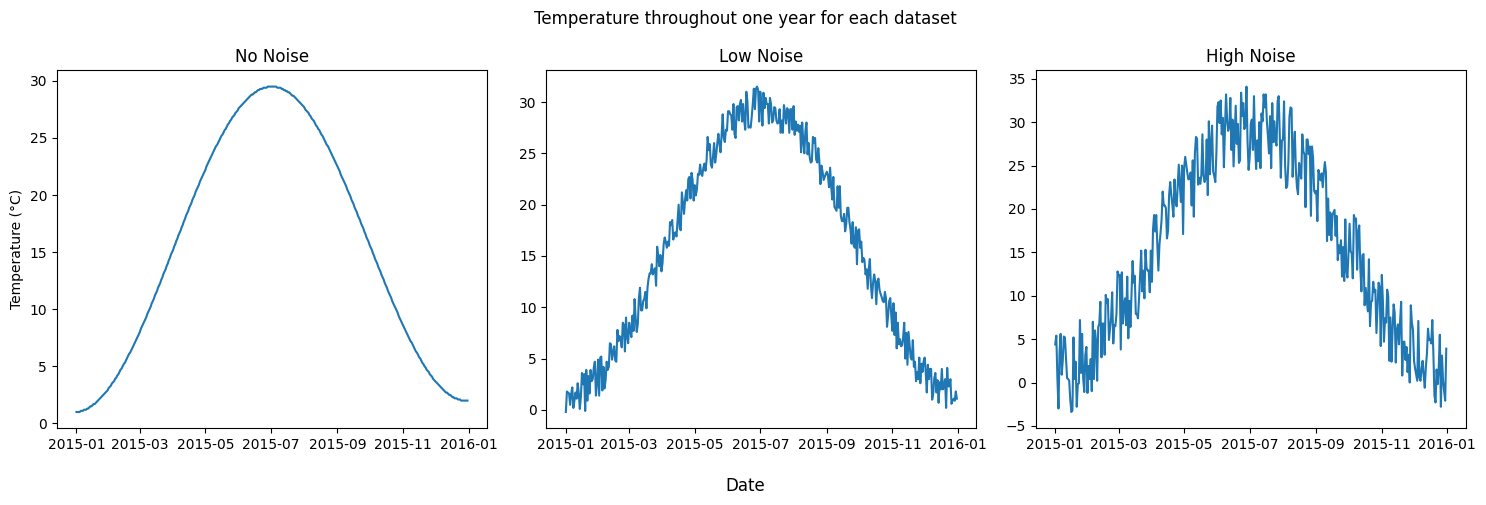

In [4]:
plot_one_year(dateranges, temperatures, titles)

c:\Users\scbui\OneDrive\Documents\Python\Time series analysis oefenen\preprocess.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax = ax,
c:\Users\scbui\OneDrive\Documents\Python\Time series analysis oefenen\preprocess.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax = ax,
c:\Users\scbui\OneDrive\Documents\Python\Time series analysis oefenen\preprocess.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax = ax,
c:\Users\scbui\OneDrive\Documents\Python\Time series analysis oefenen\preprocess.py:72: UserWarning: No artists with l

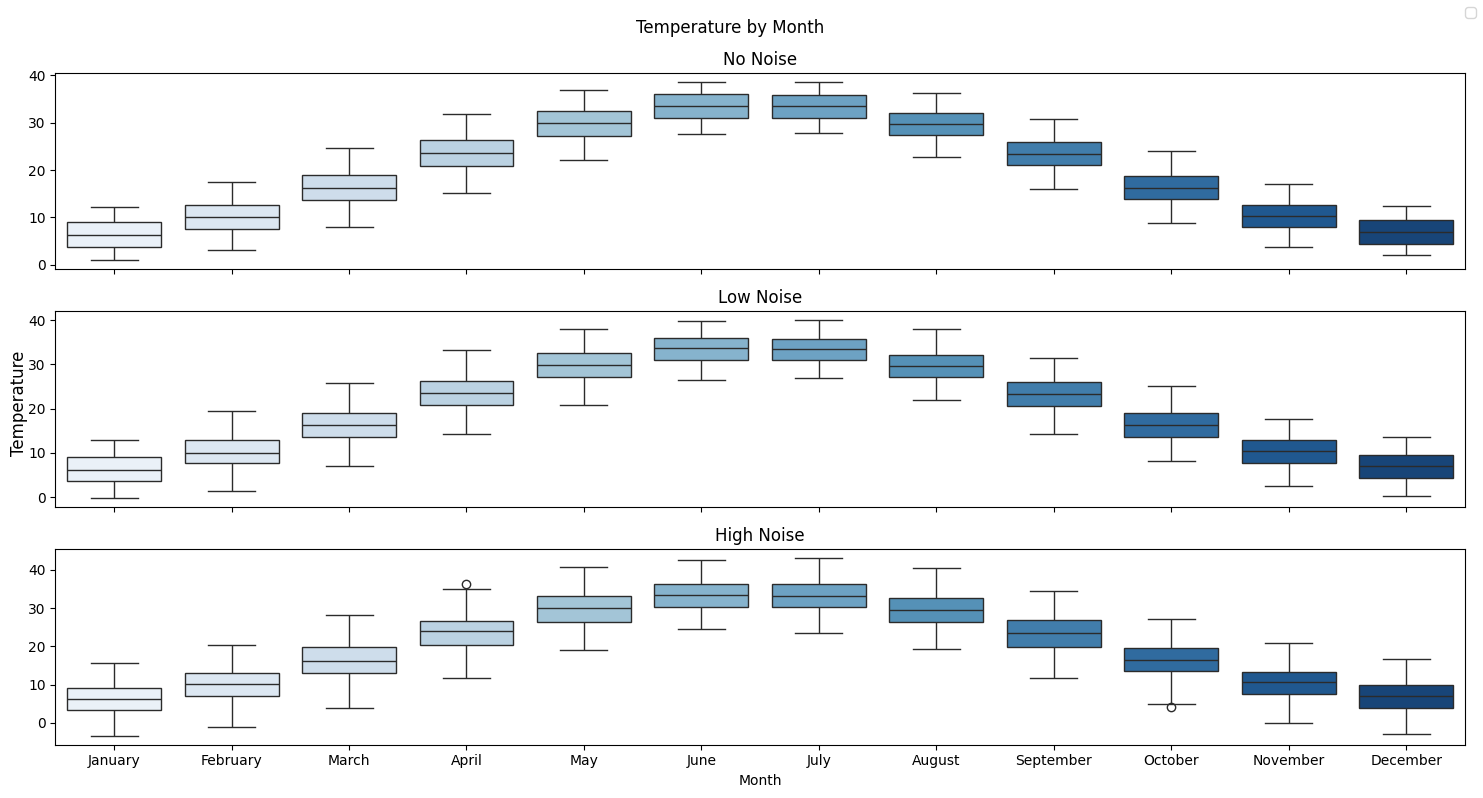

In [5]:
plot_by_month(dfs, titles)

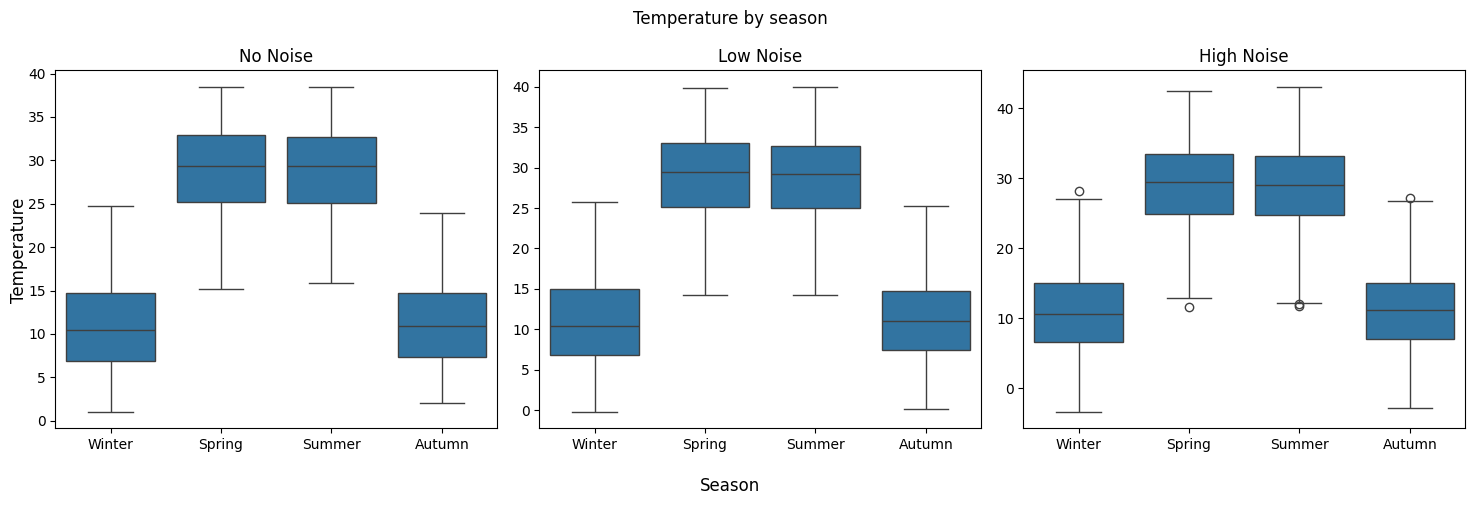

In [6]:
plot_by_season(dfs, titles)

3. Split train and test set

In [7]:
from modelling import *

In [8]:
train1, test1 = split_train_test(df1)
train2, test2 = split_train_test(df2)
train3, test3 = split_train_test(df3)

train_sets = [train1, train2, train3]
test_sets = [test1, test2, test3]

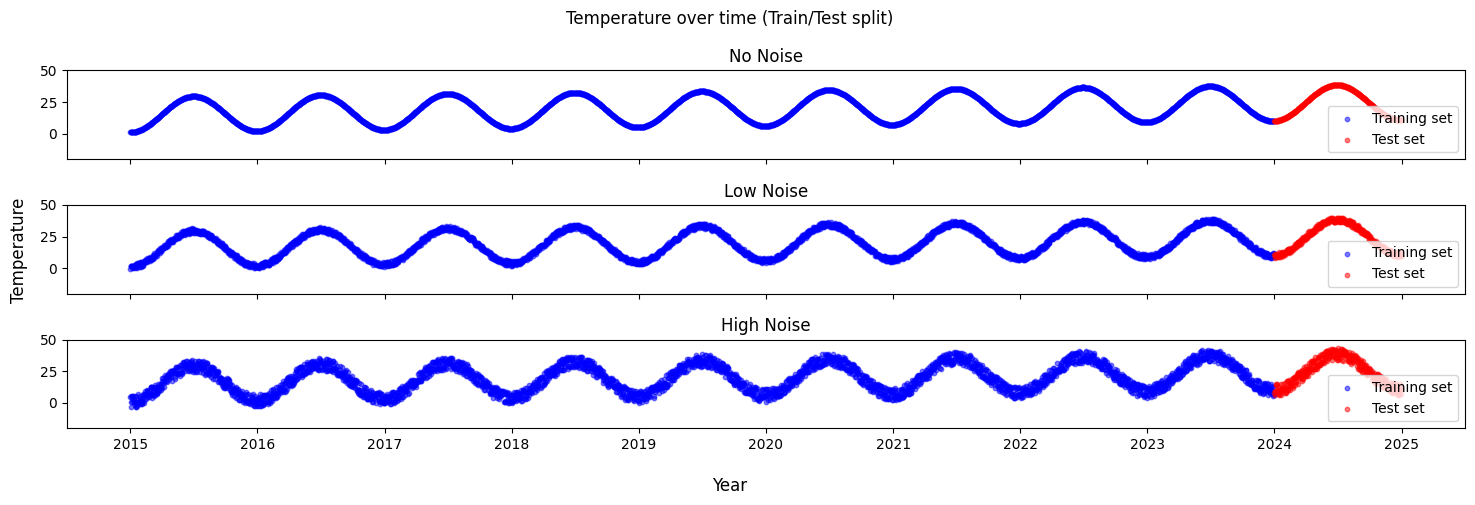

In [9]:
plot_train_and_test_set(train_sets, test_sets, titles)

4. Make sequences with five rows overlap

In [10]:
seq_length = 60
overlap = 5
X_train_set, y_train_set = create_sequences(train_sets, seq_length, overlap)
X_test_set, y_test_set = create_sequences(test_sets, seq_length, overlap)

5. Scale manually using a StandardScaler formula

In [11]:
def scaling(x_datas, y_datas):
    X_set = []
    y_set = []
    for x_data, y_data in zip(x_datas, y_datas):
        X, y = [], []
        for i in range(len(x_data)):
            mean = float(np.mean(x_data[i]))
            sd = float(np.std(x_data[i]))
            # newx = [float(((x-mean) / sd)) for x in x_data[i]] #not needed, can subtract mean and divide sd in one go
            newx = (x_data[i] - mean) / sd
            X.append(newx)

            newy = float((y_data[i] - mean) / sd)
            y.append(newy)
        X_set.append(X)
        y_set.append(y)
    return np.array(X_set), np.array(y_set)

In [12]:
X_train_scaled_set, y_train_scaled_set = scaling(X_train_set, y_train_set)
X_test_scaled_set, y_test_scaled_set = scaling(X_test_set, y_test_set)

6. Prepare the model and run it  
Some standard hyperparameters are used

In [34]:
epochs = 500
model1, history1 = train_model(X_train_scaled_set[0], y_train_scaled_set[0], epochs)

Epoch 1/500
11/11 - 2s - 160ms/step - loss: 2.7716
Epoch 2/500
11/11 - 0s - 21ms/step - loss: 1.7104
Epoch 3/500
11/11 - 0s - 19ms/step - loss: 420936416.0000
Epoch 4/500
11/11 - 0s - 22ms/step - loss: 0.8403
Epoch 5/500
11/11 - 0s - 22ms/step - loss: 0.9331
Epoch 6/500
11/11 - 0s - 25ms/step - loss: 0.9533
Epoch 7/500
11/11 - 0s - 21ms/step - loss: 0.9494
Epoch 8/500
11/11 - 0s - 25ms/step - loss: 0.9376
Epoch 9/500
11/11 - 0s - 24ms/step - loss: 0.9212
Epoch 10/500
11/11 - 0s - 22ms/step - loss: 0.9029
Epoch 11/500
11/11 - 0s - 22ms/step - loss: 0.8829
Epoch 12/500
11/11 - 0s - 33ms/step - loss: 0.8608
Epoch 13/500
11/11 - 0s - 27ms/step - loss: 0.8364
Epoch 14/500
11/11 - 0s - 26ms/step - loss: 0.8088
Epoch 15/500
11/11 - 0s - 29ms/step - loss: 0.7777
Epoch 16/500
11/11 - 0s - 27ms/step - loss: 0.7395
Epoch 17/500
11/11 - 0s - 24ms/step - loss: 0.6920
Epoch 18/500
11/11 - 0s - 27ms/step - loss: 0.6279
Epoch 19/500
11/11 - 0s - 30ms/step - loss: 0.5260
Epoch 20/500
11/11 - 0s - 26ms/

In [35]:
model2, history2 = train_model(X_train_scaled_set[1], y_train_scaled_set[1], epochs)

Epoch 1/500
11/11 - 2s - 151ms/step - loss: 1.8787
Epoch 2/500
11/11 - 0s - 26ms/step - loss: 0.9819
Epoch 3/500
11/11 - 0s - 25ms/step - loss: 5366.2881
Epoch 4/500
11/11 - 0s - 24ms/step - loss: 0.6029
Epoch 5/500
11/11 - 0s - 24ms/step - loss: 0.5783
Epoch 6/500
11/11 - 0s - 24ms/step - loss: 0.5159
Epoch 7/500
11/11 - 0s - 24ms/step - loss: 330.6816
Epoch 8/500
11/11 - 0s - 25ms/step - loss: 0.6673
Epoch 9/500
11/11 - 0s - 25ms/step - loss: 0.7365
Epoch 10/500
11/11 - 0s - 24ms/step - loss: 0.7544
Epoch 11/500
11/11 - 0s - 23ms/step - loss: 0.7577
Epoch 12/500
11/11 - 0s - 23ms/step - loss: 0.7559
Epoch 13/500
11/11 - 0s - 23ms/step - loss: 0.7526
Epoch 14/500
11/11 - 0s - 23ms/step - loss: 0.7487
Epoch 15/500
11/11 - 0s - 24ms/step - loss: 0.7450
Epoch 16/500
11/11 - 0s - 24ms/step - loss: 0.7408
Epoch 17/500
11/11 - 0s - 24ms/step - loss: 0.7358
Epoch 18/500
11/11 - 0s - 24ms/step - loss: 0.7278
Epoch 19/500
11/11 - 0s - 24ms/step - loss: 0.7131
Epoch 20/500
11/11 - 0s - 23ms/ste

In [36]:
model3, history3 = train_model(X_train_scaled_set[2], y_train_scaled_set[2], epochs)

Epoch 1/500
11/11 - 2s - 149ms/step - loss: 1.7280
Epoch 2/500
11/11 - 0s - 23ms/step - loss: 1.3117
Epoch 3/500
11/11 - 0s - 25ms/step - loss: 854825.1875
Epoch 4/500
11/11 - 0s - 24ms/step - loss: 0.7716
Epoch 5/500
11/11 - 0s - 24ms/step - loss: 0.8344
Epoch 6/500
11/11 - 0s - 24ms/step - loss: 0.8384
Epoch 7/500
11/11 - 0s - 24ms/step - loss: 0.8367
Epoch 8/500
11/11 - 0s - 25ms/step - loss: 0.7944
Epoch 9/500
11/11 - 0s - 25ms/step - loss: 0.7398
Epoch 10/500
11/11 - 0s - 25ms/step - loss: 0.6974
Epoch 11/500
11/11 - 0s - 29ms/step - loss: 0.6821
Epoch 12/500
11/11 - 0s - 25ms/step - loss: 0.6726
Epoch 13/500
11/11 - 0s - 26ms/step - loss: 0.6694
Epoch 14/500
11/11 - 0s - 33ms/step - loss: 0.6677
Epoch 15/500
11/11 - 0s - 34ms/step - loss: 0.6660
Epoch 16/500
11/11 - 0s - 32ms/step - loss: 0.6709
Epoch 17/500
11/11 - 0s - 29ms/step - loss: 0.6664
Epoch 18/500
11/11 - 0s - 33ms/step - loss: 0.6665
Epoch 19/500
11/11 - 0s - 29ms/step - loss: 0.6653
Epoch 20/500
11/11 - 0s - 27ms/ste

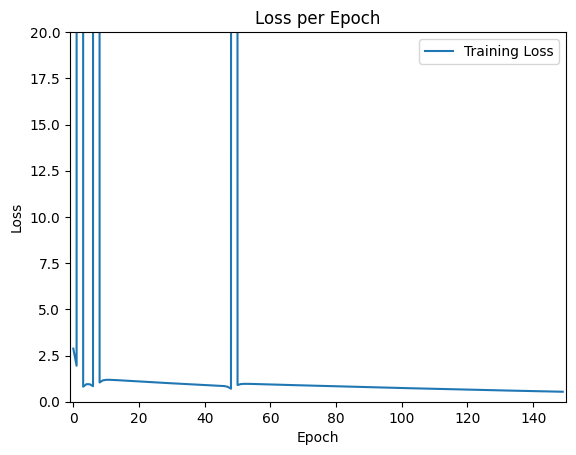

In [32]:
xlim = epochs
ylim = 20
plot_loss(history1, xlim, ylim)

7. Create dataframes to compare the predicted label with the actual label  
- Notice the apparant declining performance with higher noise
- Remember this data is still scaled

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


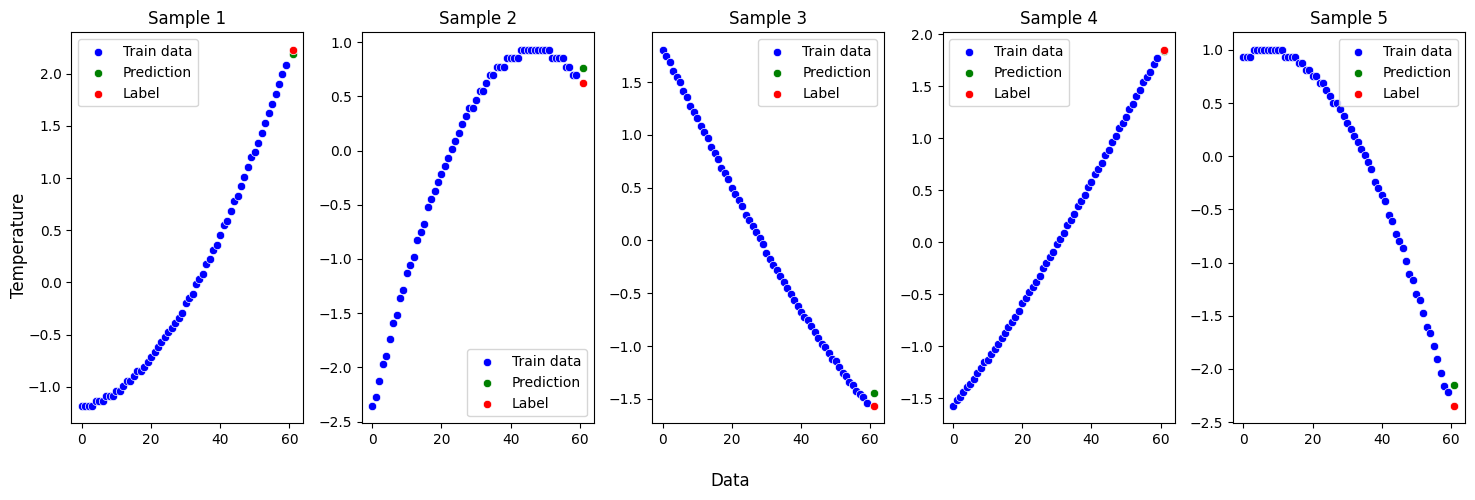

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


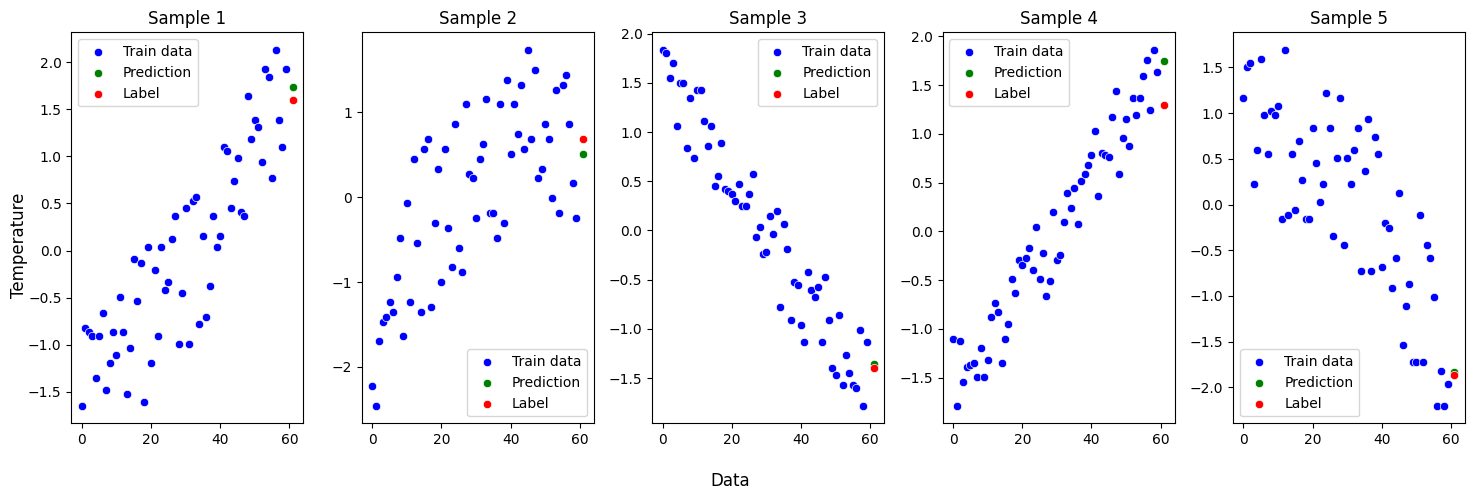

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


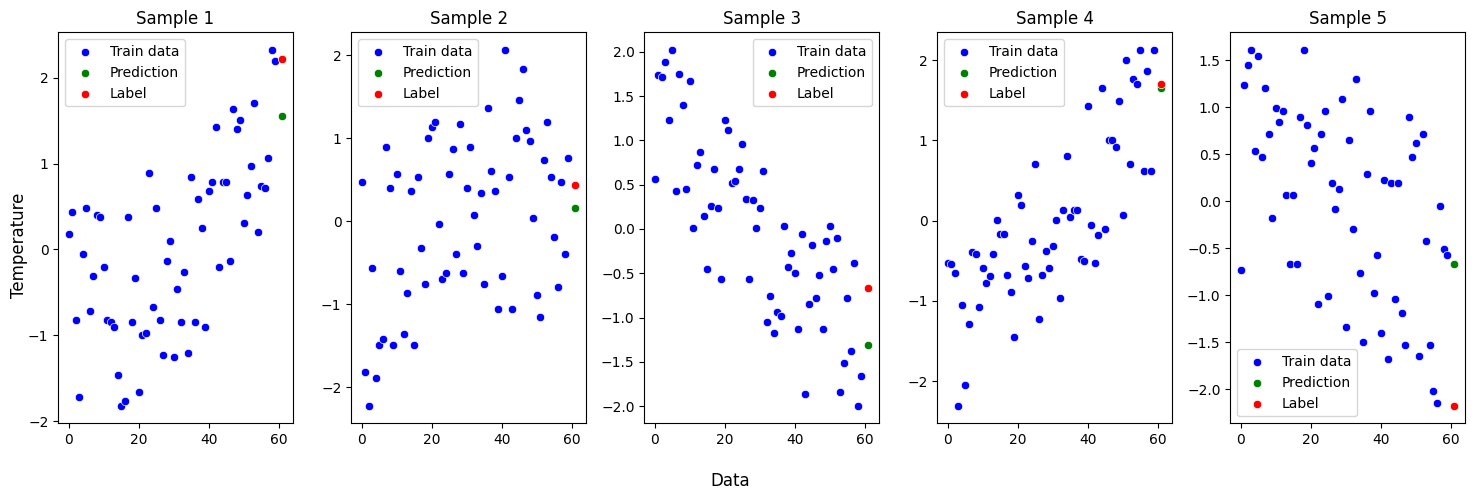

In [27]:
#def compare_performance(model, X_train_scaled_set, y_train_scaled_set):
dfs = []
for X_train_scaled, y_train_scaled in zip(X_train_scaled_set, y_train_scaled_set):
    prediction = model.predict(X_train_scaled)
    comparison_df = pd.DataFrame(columns = ["Prediction", "Correct value"])
    comparison_df["Prediction"] = prediction.flatten()
    comparison_df["Correct value"] = y_train_scaled.flatten()
    comparison_df["Difference"] = np.sqrt((comparison_df["Prediction"] - comparison_df["Correct value"])**2)
    dfs.append(comparison_df)

    fig, axes = plt.subplots(1, 5, figsize = (15, 5))
    for i, ax in enumerate(axes):
        sns.scatterplot(x = range(len(X_train_scaled[i])), y = X_train_scaled[i*100], ax = ax, label = "Train data", color = "blue")
        sns.scatterplot(x = [len(X_train_scaled[i]) + 1], y = [comparison_df["Prediction"][i*100]], ax = ax, label = "Prediction", color = "green")
        sns.scatterplot(x = [len(X_train_scaled[i]) + 1], y = [comparison_df["Correct value"][i*100]], ax=ax, label = "Label", color = "red")
        ax.set_title(f"Sample {i + 1}")

    fig.supxlabel("Data")
    fig.supylabel("Temperature")
    plt.tight_layout()
    plt.show()


In [28]:
comparison_dfs = compare_performance(model, X_train_scaled_set, y_train_scaled_set)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


The mean difference between the prediction and the label increases with noise level, indicating the model performs worse with more noise.


In [29]:
average1 = np.mean(comparison_dfs[0]["Difference"])
average2 = np.mean(comparison_dfs[1]["Difference"])
average3 = np.mean(comparison_dfs[2]["Difference"])
print(average1, average2, average3)

0.11859299967701739 0.40617125935358267 0.6836280965234655


In [36]:
test_input = X_train[0].reshape((25, 1))
test_output = model.predict(test_input)

NameError: name 'X_train' is not defined

In [ ]:
test_input

array([[-1.69427062],
       [-0.75747012],
       [-1.15895605],
       [-0.15524123],
       [ 0.44698767],
       [-1.49352765],
       [-1.62735629],
       [-1.0251274 ],
       [ 0.31315902],
       [ 0.51390199],
       [ 0.38007335],
       [ 0.71464495],
       [ 0.17933038],
       [ 0.44698767],
       [ 0.78155927],
       [-1.29278469],
       [-0.42289851],
       [-0.42289851],
       [-0.82438444],
       [ 0.71464495],
       [ 1.24995952],
       [ 0.51390199],
       [ 1.58453113],
       [ 1.65144545],
       [ 1.38378817]])

In [ ]:
test_output

array([[-0.4765435 ],
       [-0.39727396],
       [-0.48226595],
       [-0.03128445],
       [ 0.25789627],
       [-0.48804408],
       [-0.48122996],
       [-0.46501237],
       [ 0.14665213],
       [ 0.3098128 ],
       [ 0.20462443],
       [ 0.44990063],
       [ 0.08192123],
       [ 0.25789627],
       [ 0.49279654],
       [-0.48946953],
       [-0.24563281],
       [-0.24563281],
       [-0.4172063 ],
       [ 0.44990063],
       [ 0.7303212 ],
       [ 0.3098128 ],
       [ 0.84019166],
       [ 0.8579586 ],
       [ 0.77880526]], dtype=float32)

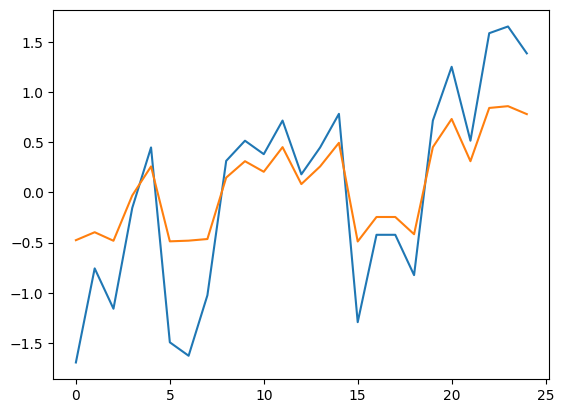

In [ ]:
plt.plot(test_input.reshape((25, )))
plt.plot(test_output.reshape((25, )))
